# Tabular Feasibility

For Wednesday June 25 you should be well on your way to assess feasibility of your project. This notebook will be submitted Friday June 27. You can find example codes in [Kaggle Lecture](https://github.com/UTA-DataScience/DATA3402.Spring.2025/blob/main/Lectures/Lecture.19/Lecture.19.ipynb) from Data 3402. You can find the recordings of a walk-through in our class Team (`Data 4380- 2024/Lecture Recordings`), Lectures 8 and 10-12.


## Define Project

To establish the context of the feasibility study, write a short introduction, mostly summarizing info that was in your proposal:

* Provide Project link.
* Short paragraph describing the challenge. 
* Briefly describe the data.
* What type of Machine Learning? Supervised Classification (binary or multiclass) or Regression? 


## MY PROJECT "THE TRUE COST OF FAST FASHION IMPACT"

To establish the context of the feasibility study, write a short introduction, mostly summarizing info that was in your proposal:
* Fast fashion is a term for inexpensive clothing produced rapidly by mass-market retailers. While accessible and trendy, it raises concerns about human rights abuses, pollution, and waste. This project investigates how fashion consumption patterns relate to sustainability, focusing on quantifiable impacts.

* Provide Project link: https://www.kaggle.com/datasets/khushikyad001/the-true-cost-of-fast-fashion-impact

* Short paragraph describing the challenge: Build a scoring or clustering model to identify the most and least sustainable fast fashion brands, based on water usage, emissions, waste production, and labor practices.

* Briefly describe the data: The dataset contains approximately 1,000 tabular entries,each representing a fashion item. Key features include CO₂ emissions, water usage, waste generated, product type, brand, price, and labor practices. The main output variable is a sustainability score, which quantifies the overall impact of an item on the environment and society.

  
* What type of Machine Learning? Supervised Classification (binary or multiclass) or Regression?: 
This is a Supervised Regression task. The goal is to predict a continuous numeric value the sustainability score, based on environmental and production-related features.


## Data Loading and Initial Look

First lets establish that the data is in good shape:

* Load the data. 
* Count the number of rows (data points) and features.
* Any missing values? 
* Make a table, where each row is a feature or collection of features:
    * Is the feature categorical or numerical
    * What values? 
        * e.g. for categorical: "0,1,2"
        * e.g. for numerical specify the range
    * How many missing values
    * Do you see any outliers?
        * Define outlier.
    * If you have a lot of features, summarize (e.g. 100 categorical and 500 numerical features).
* For classification is there class imbalance?
* What is the target:
    * Classification: how is the target encoded (e.g. 0 and 1)?
    * Regression: what is the range?

In [147]:
#Load Data
import pandas as pd
import numpy as np

df = pd.read_csv("true_cost_fast_fashion.csv")


df.head()


,Brand,Country,Year,Monthly_Production_Tonnes,Avg_Item_Price_USD,Release_Cycles_Per_Year,Carbon_Emissions_tCO2e,Water_Usage_Million_Litres,Landfill_Waste_Tonnes,Avg_Worker_Wage_USD,...,Instagram_Mentions_Thousands,TikTok_Mentions_Thousands,Sentiment_Score,Social_Sentiment_Label,GDP_Contribution_Million_USD,Env_Cost_Index,Sustainability_Score,Transparency_Index,Compliance_Score,Ethical_Rating
0,Shein,Indonesia,2017,574.51,19.31,16,11421.58,282.11,616.63,143.79,...,4655,3435,0.05,Neutral,608.51,0.49,29.12,61.19,13.95,1.46
1,Forever 21,Vietnam,2024,394.50,9.30,20,5571.01,289.22,795.11,167.78,...,9655,6285,-0.12,Positive,689.49,0.21,49.52,3.44,90.93,1.29
2,Uniqlo,India,2024,310.23,25.46,11,10969.00,116.39,364.33,97.81,...,8016,387,0.08,Neutral,439.78,0.63,96.53,60.70,27.60,1.48
3,Forever 21,USA,2017,218.65,13.17,13,13093.00,255.88,632.16,134.54,...,8254,1620,-0.06,Neutral,746.70,0.21,71.32,76.08,56.13,3.85
4,Zara,Indonesia,2016,1005.84,15.40,20,9548.40,142.07,830.10,144.33,...,1778,3292,-0.59,Neutral,571.42,0.95,59.89,69.48,88.05,3.12


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Brand                         3000 non-null   object 
 1   Country                       3000 non-null   object 
 2   Year                          3000 non-null   int64  
 3   Monthly_Production_Tonnes     3000 non-null   float64
 4   Avg_Item_Price_USD            3000 non-null   float64
 5   Release_Cycles_Per_Year       3000 non-null   int64  
 6   Carbon_Emissions_tCO2e        3000 non-null   float64
 7   Water_Usage_Million_Litres    3000 non-null   float64
 8   Landfill_Waste_Tonnes         3000 non-null   float64
 9   Avg_Worker_Wage_USD           3000 non-null   float64
 10  Working_Hours_Per_Week        3000 non-null   int64  
 11  Child_Labor_Incidents         3000 non-null   int64  
 12  Return_Rate_Percent           3000 non-null   float64
 13  Avg

In [149]:
df.describe()

,Year,Monthly_Production_Tonnes,Avg_Item_Price_USD,Release_Cycles_Per_Year,Carbon_Emissions_tCO2e,Water_Usage_Million_Litres,Landfill_Waste_Tonnes,Avg_Worker_Wage_USD,Working_Hours_Per_Week,Child_Labor_Incidents,...,Shopping_Frequency_Per_Year,Instagram_Mentions_Thousands,TikTok_Mentions_Thousands,Sentiment_Score,GDP_Contribution_Million_USD,Env_Cost_Index,Sustainability_Score,Transparency_Index,Compliance_Score,Ethical_Rating
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000
mean,2019.529667,497.319890,19.936187,17.757333,10003.873717,200.924420,795.028837,149.817727,54.695000,0.997000,...,11.008333,5054.240667,3975.165667,0.001597,503.092523,0.555630,49.854920,49.55111,49.964307,2.521597
std,2.894002,149.543176,4.919126,6.981358,3017.980553,60.483385,201.440989,49.792421,8.648675,1.005648,...,4.909613,2858.367381,2268.386606,0.579073,195.961926,0.263294,28.627411,28.98745,28.855005,1.443130
min,2015.000000,3.820000,1.090000,6.000000,206.090000,-38.060000,58.240000,-52.700000,40.000000,0.000000,...,3.000000,110.000000,54.000000,-1.000000,-96.430000,0.100000,0.010000,0.07000,0.030000,0.000000
25%,2017.000000,396.360000,16.540000,12.000000,7892.112500,160.317500,655.840000,116.692500,47.000000,0.000000,...,7.000000,2558.750000,2046.250000,-0.490000,369.370000,0.330000,25.322500,25.13000,25.352500,1.270000
50%,2020.000000,495.535000,19.890000,18.000000,9926.940000,200.315000,799.995000,149.695000,55.000000,1.000000,...,11.000000,5055.500000,3946.500000,0.010000,503.990000,0.560000,50.400000,49.04000,50.235000,2.530000
75%,2022.000000,596.800000,23.320000,24.000000,12012.625000,240.662500,934.147500,183.747500,62.000000,2.000000,...,15.000000,7499.250000,5854.250000,0.500000,634.150000,0.780000,74.562500,75.14500,74.640000,3.792500
max,2024.000000,1005.840000,36.460000,29.000000,19585.470000,403.830000,1480.380000,326.450000,69.000000,5.000000,...,19.000000,9998.000000,7995.000000,1.000000,1145.800000,1.000000,99.990000,99.97000,100.000000,5.000000


In [150]:
#number of rows and features
num_rows, num_columns = df.shape
print(f"Number of rows (data points): {num_rows}")
print(f"Number of columns (features): {num_columns}")


Number of rows (data points): 3000
Number of columns (features): 25


In [151]:
#missing value
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Optional: total number of missing cells
total_missing = missing_values.sum()
print(f"\nTotal missing values in dataset: {total_missing}")


Missing values per column:
Brand                           0
Country                         0
Year                            0
Monthly_Production_Tonnes       0
Avg_Item_Price_USD              0
Release_Cycles_Per_Year         0
Carbon_Emissions_tCO2e          0
Water_Usage_Million_Litres      0
Landfill_Waste_Tonnes           0
Avg_Worker_Wage_USD             0
Working_Hours_Per_Week          0
Child_Labor_Incidents           0
Return_Rate_Percent             0
Avg_Spend_Per_Customer_USD      0
Shopping_Frequency_Per_Year     0
Instagram_Mentions_Thousands    0
TikTok_Mentions_Thousands       0
Sentiment_Score                 0
Social_Sentiment_Label          0
GDP_Contribution_Million_USD    0
Env_Cost_Index                  0
Sustainability_Score            0
Transparency_Index              0
Compliance_Score                0
Ethical_Rating                  0
dtype: int64

Total missing values in dataset: 0


In [152]:
summary_table = []

for col in df.columns:
    dtype = df[col].dtype
    
    if dtype == 'object':
        feature_type = 'Categorical'
        unique_vals = df[col].dropna().unique()
        unique_display = ', '.join(map(str, unique_vals[:5]))
        if len(unique_vals) > 5:
            unique_display += ', ...'
    else:
        feature_type = 'Numerical'
        min_val = df[col].min()
        max_val = df[col].max()
        unique_display = f"{min_val} to {max_val}"

    summary_table.append([col, feature_type, unique_display])

feature_summary_df = pd.DataFrame(summary_table, columns=["Feature", "Type", "Values or Range"])
feature_summary_df


,Feature,Type,Values or Range
0,Brand,Categorical,"Shein, Forever 21, Uniqlo, Zara, H&M"
1,Country,Categorical,"Indonesia, Vietnam, India, USA, Turkey, ..."
2,Year,Numerical,2015 to 2024
3,Monthly_Production_Tonnes,Numerical,3.82 to 1005.84
4,Avg_Item_Price_USD,Numerical,1.09 to 36.46
5,Release_Cycles_Per_Year,Numerical,6 to 29
6,Carbon_Emissions_tCO2e,Numerical,206.09 to 19585.47
7,Water_Usage_Million_Litres,Numerical,-38.06 to 403.83
8,Landfill_Waste_Tonnes,Numerical,58.24 to 1480.38
9,Avg_Worker_Wage_USD,Numerical,-52.7 to 326.45


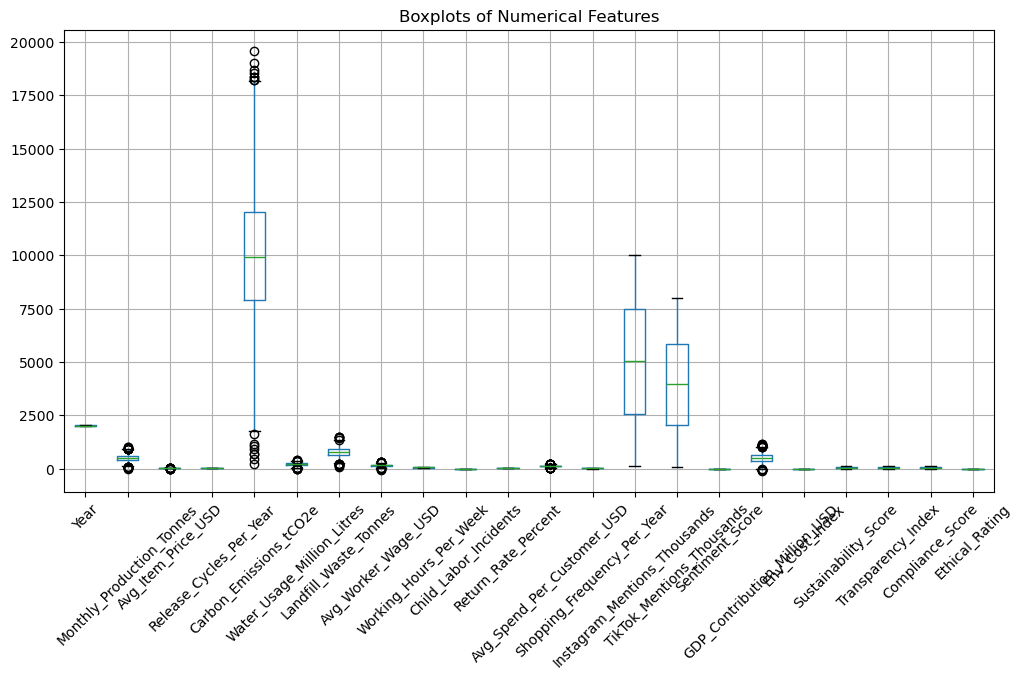

In [153]:
import matplotlib.pyplot as plt

df.select_dtypes(include=['float64', 'int64']).boxplot(figsize=(12, 6))
plt.title("Boxplots of Numerical Features")
plt.xticks(rotation=45)
plt.show()


In [154]:
categorical_features = df.select_dtypes(include='object').columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

num_categorical = len(categorical_features)
num_numerical = len(numerical_features)

print(f"Categorical features: {num_categorical}")
print(f"Numerical features: {num_numerical}")


Categorical features: 3
Numerical features: 22


In [155]:
from sklearn.preprocessing import MinMaxScaler

features_positive = ['Avg_Worker_Wage_USD', 'Compliance_Score']  # Higher is better
features_negative = ['Carbon_Emissions_tCO2e', 'Water_Usage_Million_Litres',
                     'Landfill_Waste_Tonnes', 'Child_Labor_Incidents', 'Working_Hours_Per_Week',
                     'Env_Cost_Index']  # Lower is better

all_features = features_positive + features_negative
df_clean = df[all_features].dropna()

#Scale all features between 0 and 1
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=all_features)

for col in features_negative:
    df_scaled[col] = 1 - df_scaled[col]

df_scaled['Sustainability_Score_New'] = df_scaled.mean(axis=1)

df['Sustainability_Score_New'] = df_scaled['Sustainability_Score_New']


## Data Visualization

Next perform your first visualizaion:

* For classification: compare histogram every feature between the classes. Lots of examples of this in class.
* For regression: 
    * Define 2 or more class based on value of the regression target.
        * For example: if regression target is between 0 and 1:
            * 0.0-0.25: Class 1
            * 0.25-0.5: Class 2
            * 0.5-0.75: Class 3
            * 0.75-1.0: Class 4
    * Compare histograms of the features between the classes.
        
* Note that for categorical features, often times the information in the histogram could be better presented in a table.    
* Make comments on what features look most promising for ML task.

In [157]:
df['Sustainability_Label'] = pd.qcut(df['Sustainability_Score_New'], q=3, labels=['Low', 'Medium', 'High'])


/var/folders/mn/k3wym2yn2b1dt_j7ybx2zjm80000gn/T/ipykernel_13156/1796610421.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sustainability')


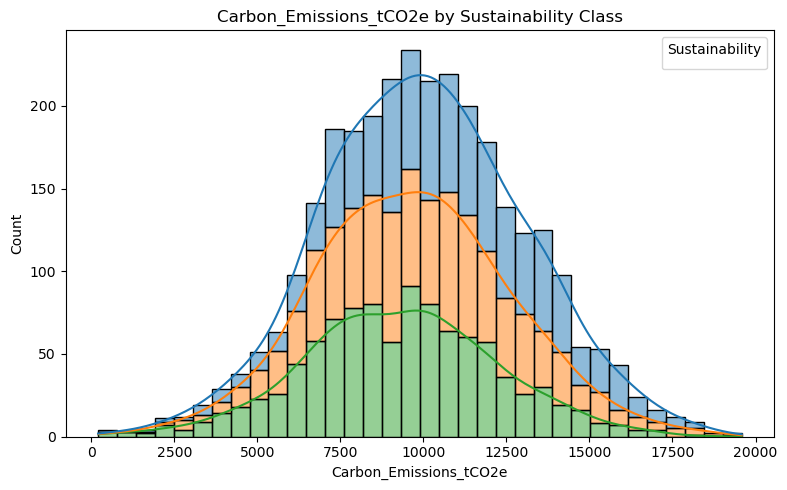

/var/folders/mn/k3wym2yn2b1dt_j7ybx2zjm80000gn/T/ipykernel_13156/1796610421.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sustainability')


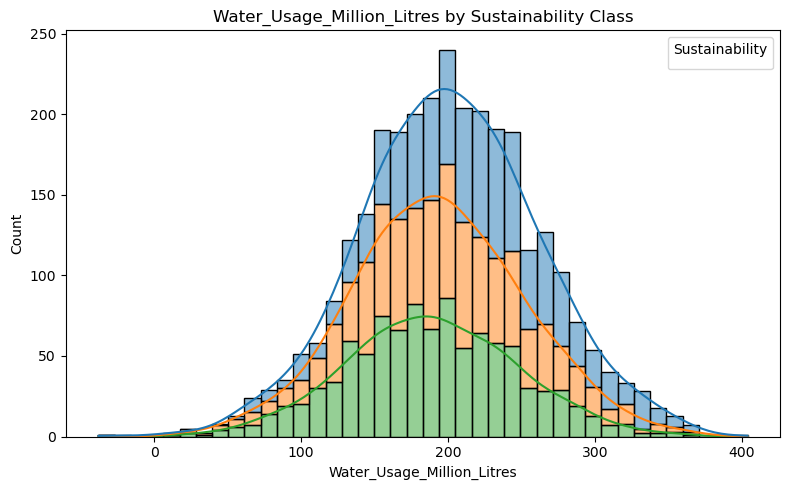

/var/folders/mn/k3wym2yn2b1dt_j7ybx2zjm80000gn/T/ipykernel_13156/1796610421.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sustainability')


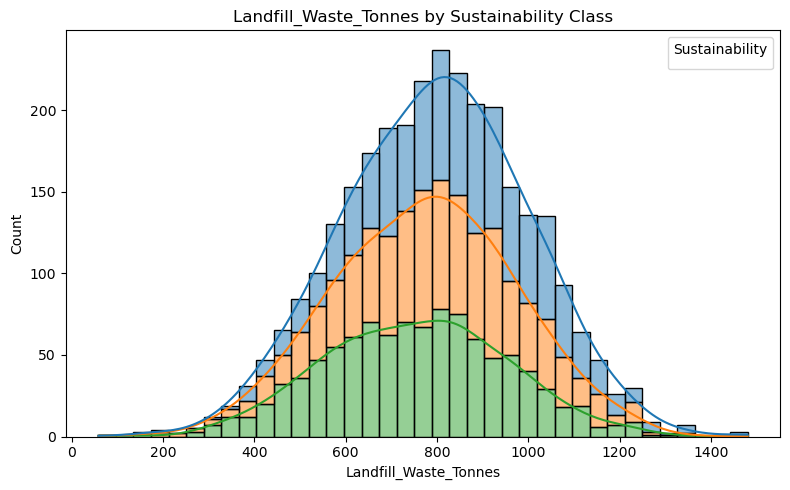

/var/folders/mn/k3wym2yn2b1dt_j7ybx2zjm80000gn/T/ipykernel_13156/1796610421.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sustainability')


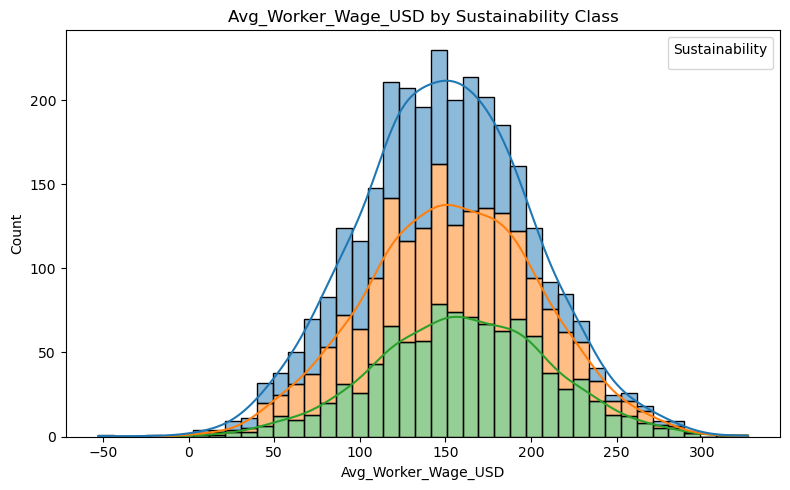

/var/folders/mn/k3wym2yn2b1dt_j7ybx2zjm80000gn/T/ipykernel_13156/1796610421.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sustainability')


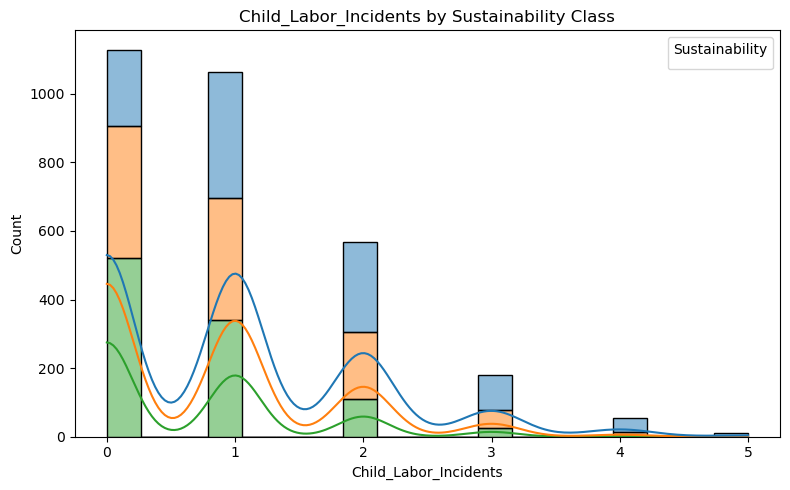

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

features_to_plot = ['Carbon_Emissions_tCO2e', 'Water_Usage_Million_Litres',
                    'Landfill_Waste_Tonnes', 'Avg_Worker_Wage_USD', 'Child_Labor_Incidents']

#Plot histograms
for feature in features_to_plot:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=feature, hue='Sustainability_Label', kde=True, multiple='stack')
    plt.title(f'{feature} by Sustainability Class')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Sustainability')
    plt.tight_layout()
    plt.show()


In [159]:
# Bin the sustainability score into 4 equal-width classes
df['Sustainability_Quartile'] = pd.cut(
    df['Sustainability_Score_New'],
    bins=[0.0, 0.25, 0.5, 0.75, 1.0],
    labels=['Class 1 (Least Sustainable)', 'Class 2', 'Class 3', 'Class 4 (Most Sustainable)']
)


/var/folders/mn/k3wym2yn2b1dt_j7ybx2zjm80000gn/T/ipykernel_13156/1252421469.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sustainability Class')


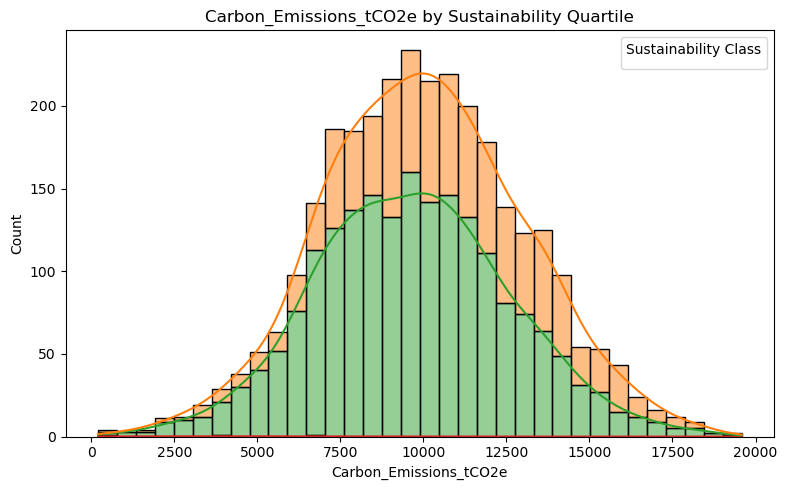

/var/folders/mn/k3wym2yn2b1dt_j7ybx2zjm80000gn/T/ipykernel_13156/1252421469.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sustainability Class')


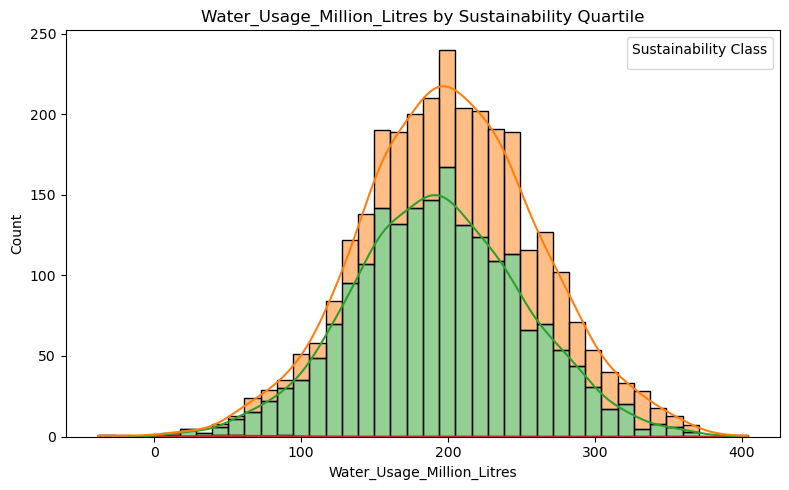

/var/folders/mn/k3wym2yn2b1dt_j7ybx2zjm80000gn/T/ipykernel_13156/1252421469.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sustainability Class')


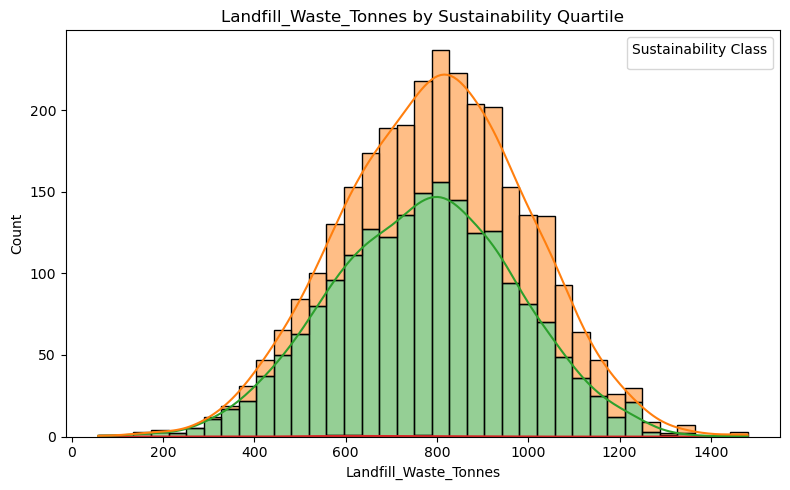

/var/folders/mn/k3wym2yn2b1dt_j7ybx2zjm80000gn/T/ipykernel_13156/1252421469.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sustainability Class')


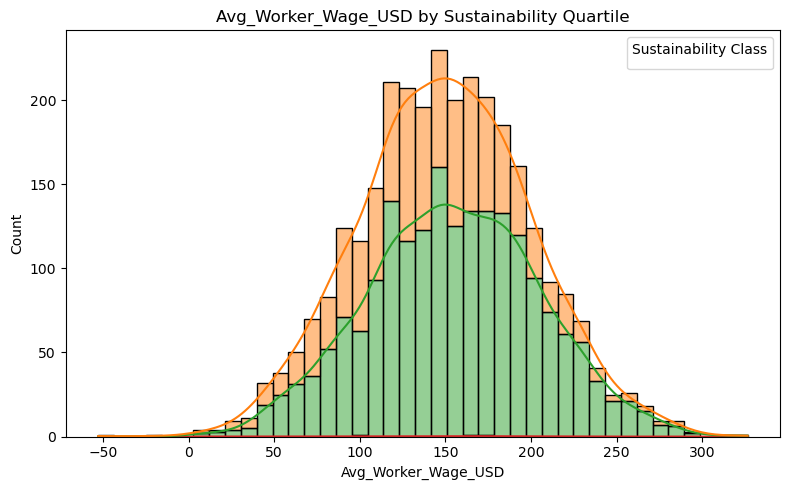

/var/folders/mn/k3wym2yn2b1dt_j7ybx2zjm80000gn/T/ipykernel_13156/1252421469.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sustainability Class')


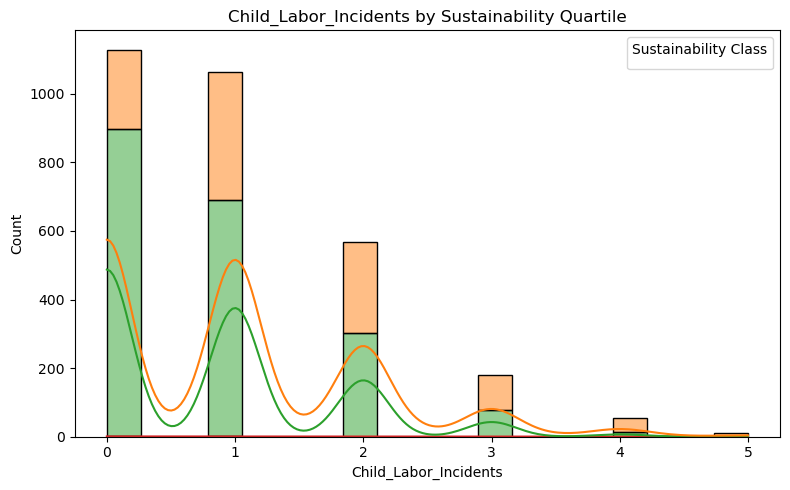

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

features_to_plot = ['Carbon_Emissions_tCO2e', 'Water_Usage_Million_Litres',
                    'Landfill_Waste_Tonnes', 'Avg_Worker_Wage_USD', 'Child_Labor_Incidents']

for feature in features_to_plot:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=feature, hue='Sustainability_Quartile', kde=True, multiple='stack')
    plt.title(f'{feature} by Sustainability Quartile')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Sustainability Class')
    plt.tight_layout()
    plt.show()


In [161]:
categorical_cols = ['Brand', 'Country', 'Social_Sentiment_Label', 'Ethical_Rating']

for col in categorical_cols:
    print(f"\n{col} distribution:")
    print(df[col].value_counts())



Brand distribution:
Brand
H&M           650
Forever 21    617
Zara          606
Uniqlo        581
Shein         546
Name: count, dtype: int64

Country distribution:
Country
India         314
USA           312
Germany       309
UK            309
Indonesia     300
Turkey        300
Vietnam       297
Bangladesh    296
Brazil        293
China         270
Name: count, dtype: int64

Social_Sentiment_Label distribution:
Social_Sentiment_Label
Neutral     1027
Positive     998
Negative     975
Name: count, dtype: int64

Ethical_Rating distribution:
Ethical_Rating
4.21    14
4.60    14
4.26    13
4.18    13
2.16    13
        ..
2.56     1
1.90     1
0.06     1
2.23     1
2.91     1
Name: count, Length: 499, dtype: int64


## Data Cleaning and Preperation for Machine Learning

Based on what you find above, prepare the data for ML.

* Perform any data cleaning. Be clear what are you doing, for what feature. 
* Determinine if rescaling is important for your Machine Learning model.
    * If so select strategy for each feature.
    * Apply rescaling.
* Visualize the features before and after cleaning and rescaling.
* One-hot encode your categorical features.

In [163]:
drop_cols = ['Brand', 'Country', 'Year', 'Sustainability_Score']  # You already created a new version
df_cleaned = df.drop(columns=drop_cols)


In [164]:
missing = df_cleaned.isnull().sum()
print("Missing values per column:\n", missing[missing > 0])


Missing values per column:
 Series([], dtype: int64)


In [165]:
df_cleaned = df_cleaned.dropna()


In [166]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Social_Sentiment_Label', 'Ethical_Rating']
for col in categorical_cols:
    if col in df_cleaned.columns:
        le = LabelEncoder()
        df_cleaned[col] = le.fit_transform(df_cleaned[col])


In [167]:
from sklearn.preprocessing import StandardScaler

# Separate features from target
X = df_cleaned.drop(columns=['Sustainability_Score_New'])
y = df_cleaned['Sustainability_Score_New']

# Identify numeric columns to scale
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Initialize and apply scaler
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X[numeric_cols])



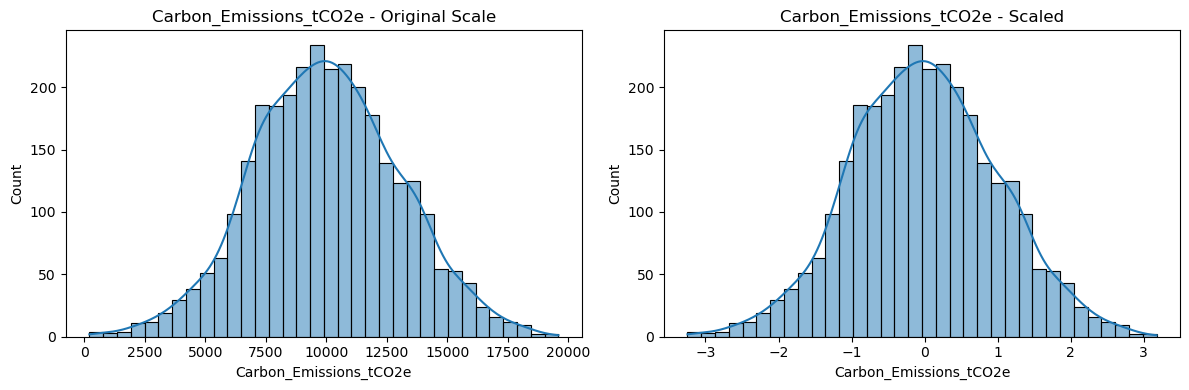

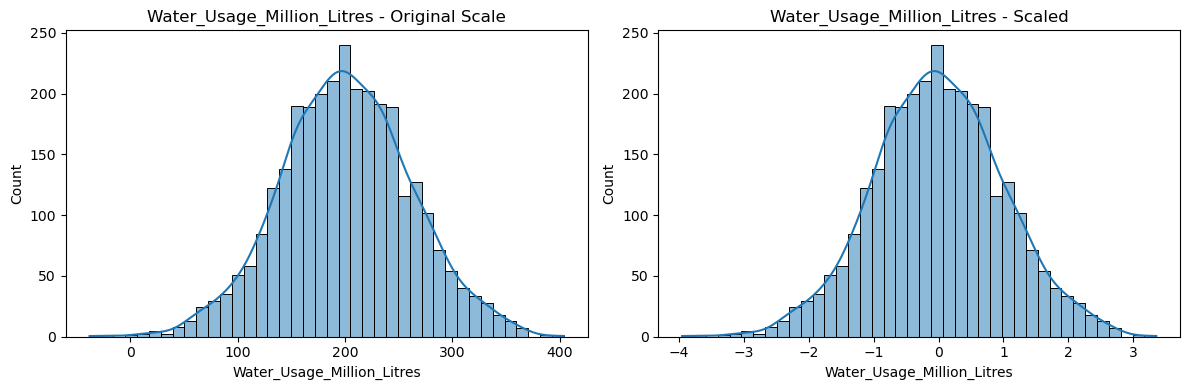

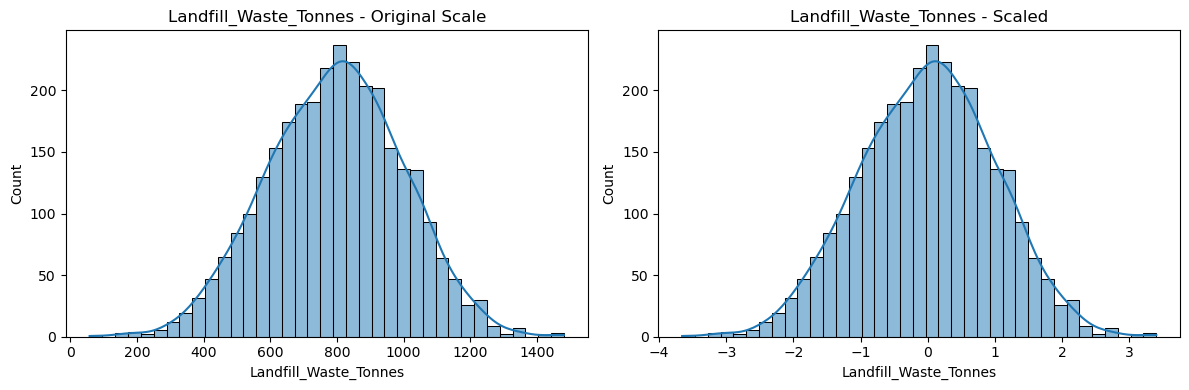

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

features_to_plot = ['Carbon_Emissions_tCO2e', 'Water_Usage_Million_Litres', 'Landfill_Waste_Tonnes']

for feature in features_to_plot:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    
    sns.histplot(X[feature], ax=ax[0], kde=True)
    ax[0].set_title(f'{feature} - Original Scale')
    
    sns.histplot(X_scaled[feature], ax=ax[1], kde=True)
    ax[1].set_title(f'{feature} - Scaled')
    
    plt.tight_layout()
    plt.show()


In [169]:
sustainability_features = ['Carbon_Emissions_tCO2e', 'Water_Usage_Million_Litres',
                           'Landfill_Waste_Tonnes', 'Avg_Worker_Wage_USD',
                           'Working_Hours_Per_Week', 'Child_Labor_Incidents',
                           'Env_Cost_Index', 'Compliance_Score', 'Transparency_Index',
                           'Sentiment_Score', 'Sustainability_Score_New']

brand_grouped = df.groupby('Brand')[sustainability_features].mean().reset_index()


In [170]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_brand = scaler.fit_transform(brand_grouped[sustainability_features])


In [171]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=3, random_state=42)
brand_grouped['Sustainability_Cluster'] = kmeans.fit_predict(X_brand)


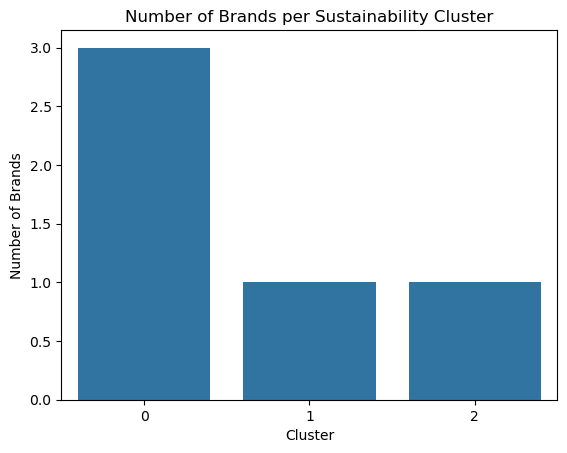

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(data=brand_grouped, x='Sustainability_Cluster', order=sorted(brand_grouped['Sustainability_Cluster'].unique()))
plt.title('Number of Brands per Sustainability Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Brands')
plt.show()


In [173]:
for cluster in sorted(brand_grouped['Sustainability_Cluster'].unique()):
    print(f"\nCluster {cluster}:")
    print(brand_grouped[brand_grouped['Sustainability_Cluster'] == cluster]['Brand'].values)



Cluster 0:
['H&M' 'Shein' 'Zara']

Cluster 1:
['Uniqlo']

Cluster 2:
['Forever 21']


In [220]:
duplicates.head()

,Brand,Country,Year,Monthly_Production_Tonnes,Avg_Item_Price_USD,Release_Cycles_Per_Year,Carbon_Emissions_tCO2e,Water_Usage_Million_Litres,Landfill_Waste_Tonnes,Avg_Worker_Wage_USD,...,Instagram_Mentions_Thousands,TikTok_Mentions_Thousands,Sentiment_Score,Social_Sentiment_Label,GDP_Contribution_Million_USD,Env_Cost_Index,Sustainability_Score,Transparency_Index,Compliance_Score,Ethical_Rating


In [230]:
from sklearn.preprocessing import MinMaxScaler

features_positive = ['Avg_Worker_Wage_USD', 'Compliance_Score']
features_negative = ['Carbon_Emissions_tCO2e', 'Water_Usage_Million_Litres',
                     'Landfill_Waste_Tonnes', 'Child_Labor_Incidents',
                     'Working_Hours_Per_Week', 'Env_Cost_Index']

all_features = features_positive + features_negative

df_clean = df[all_features].dropna()

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=all_features)

for col in features_negative:
    df_scaled[col] = 1 - df_scaled[col]


df_scaled['Sustainability_Score_New'] = df_scaled.mean(axis=1)

df['Sustainability_Score_New'] = df_scaled['Sustainability_Score_New']


In [232]:
df[['Brand', 'Sustainability_Score_New']].head()


,Brand,Sustainability_Score_New
0,Shein,0.447925
1,Forever 21,0.686877
2,Uniqlo,0.557535
3,Forever 21,0.574020
4,Zara,0.558938


In [234]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
brand_grouped['Sustainability_Cluster'] = kmeans.fit_predict(X_brand)


In [236]:
top_brands = df.groupby('Brand')['Sustainability_Score_New'].mean().sort_values(ascending=False)
bottom_brands = top_brands.tail(5)
top_brands = top_brands.head(5)



## Final Summary

* We built a custom sustainability score using environmental and labor indicators including water usage, carbon emissions, landfill waste, child labor incidents, and worker wages.

* We applied clustering to group brands into sustainability performance categories.  
Alternatively, we ranked brands by average sustainability score.

* These insights help identify which fast fashion brands are leading or lagging in sustainability, and provide a data-driven foundation for ethical consumer decisions or corporate policy.

